# Notebook Imports and Packages


In [77]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap

import random

%matplotlib inline  
# führt dazu, dass die plots gut exportiert werden können und direkt sichtbar sind


## Example 1 - A simple cost function

$f(x) = x^2 + x +1$


In [19]:
def f(x):
    return x**2 + x +1

In [20]:
#Make Data
x_1 = np.linspace(start=-3, stop =3, num =500)
# erstellt eine von 100 zahlen zwischen -3 und 3



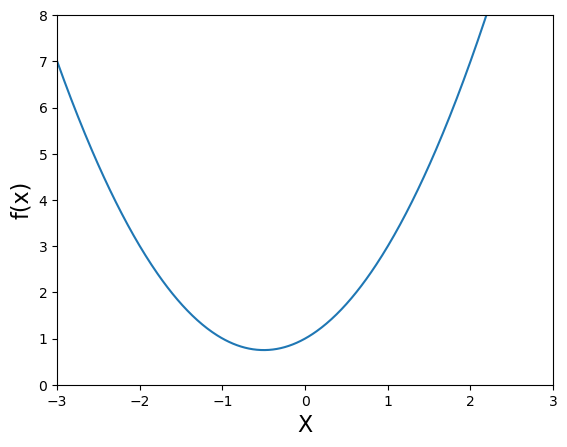

In [21]:
#Plot our data

plt.xlim([-3,3])
plt.ylim(0,8)

plt.xlabel("X", fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)


plt.plot(x_1, f(x_1))


plt.show()

## Slope & Derivatives - Neigung und Ableitungen
Um die die Kosten Funktion zu erfüllen müssen wir den punkt der minimalen Steigung in der Kurve finden -> Ableiten


In [22]:
def df(x):
    return 2*x +1

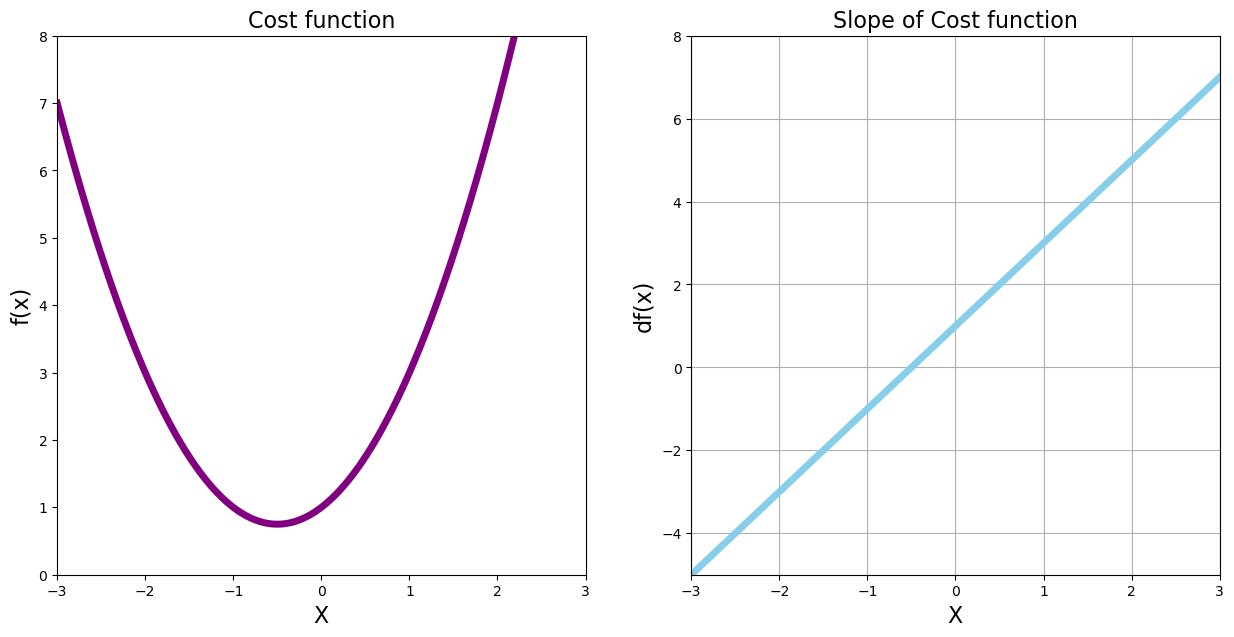

In [23]:
# side by side view 2 plots -> subplots

plt.figure(figsize =[15,7])

plt.subplot(1,2,1)
# subplot(row, column, index)
plt.xlim([-3,3])
plt.ylim(0,8)

plt.title("Cost function", fontsize = 16)
plt.xlabel("X", fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)

plt.plot(x_1, f(x_1), color = "purple", linewidth=5)

#second plot:

plt.subplot(1,2,2)
plt.title("Slope of Cost function", fontsize = 16)
plt.xlim([-3,3])

plt.grid()
plt.ylim(-5,8)
plt.xlabel("X", fontsize = 16)
plt.ylabel("df(x)", fontsize = 16)

plt.plot(x_1, df(x_1), color = "skyblue", linewidth=5)



plt.show()

# gradient descent algorithm -> finds the steepest part -> lowest cost
## a.k.a steepest descent




In [24]:
new_x = 3
prev_x =0
step_multiplier = 0.1

for n in range(100):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x -step_multiplier * gradient

    # dadurch bewegen wir uns in Richtung des Minimus 
    # wir bekommen nach den Durchlaufen dann einen Wert X heraus an dem das Minimum liegt
    # -step_multiplier * gradient hier liegt das Lernen, also das Anpassen des
    # Algorithmus -> predict > Calculate error > learn/adapt
    
print(f"Local minimum is at: {new_x}")
print(f"Steigung oder df(x) an der Stelle ist {df(new_x)}")
print(f"f(x) and dem Punkt ist {f(new_x)}")

    

Local minimum is at: -0.4999999992870374
Steigung oder df(x) an der Stelle ist 1.4259251557291464e-09
f(x) and dem Punkt ist 0.75


## Adding Precision to run until we hit the desired outcome precision


In [25]:


new_x = 3
prev_x =0
step_multiplier = 0.1
precision = 0.0000001  # gewünschte Präzision
# präzision ist der Unterschie zwischen dem alten und neuem x wert
# wenn wir ganz nah sind wird der Unterschied immer geringer


for n in range(100):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x -step_multiplier * gradient

    # dadurch bewegen wir uns in Richtung des Minimus 
    # wir bekommen nach den Durchlaufen dann einen Wert X heraus an dem das Minimum liegt
    # -step_multiplier * gradient hier liegt das Lernen, also das Anpassen des
    # Algorithmus -> predict > Calculate error > learn/adapt
    
    step_size = abs(new_x - prev_x)
    #print(step_size)
    if step_size <= precision:
        print("präzise ! ")
        print(n)
        break
    
print(f"Local minimum is at: {new_x}")
print(f"Steigung oder df(x) an der Stelle ist {df(new_x)}")
print(f"f(x) and dem Punkt ist {f(new_x)}")

    

präzise ! 
71
Local minimum is at: -0.4999996314069791
Steigung oder df(x) an der Stelle ist 7.371860417659803e-07
f(x) and dem Punkt ist 0.7500000000001359


## Let's make it visual!

präzise ! 
71


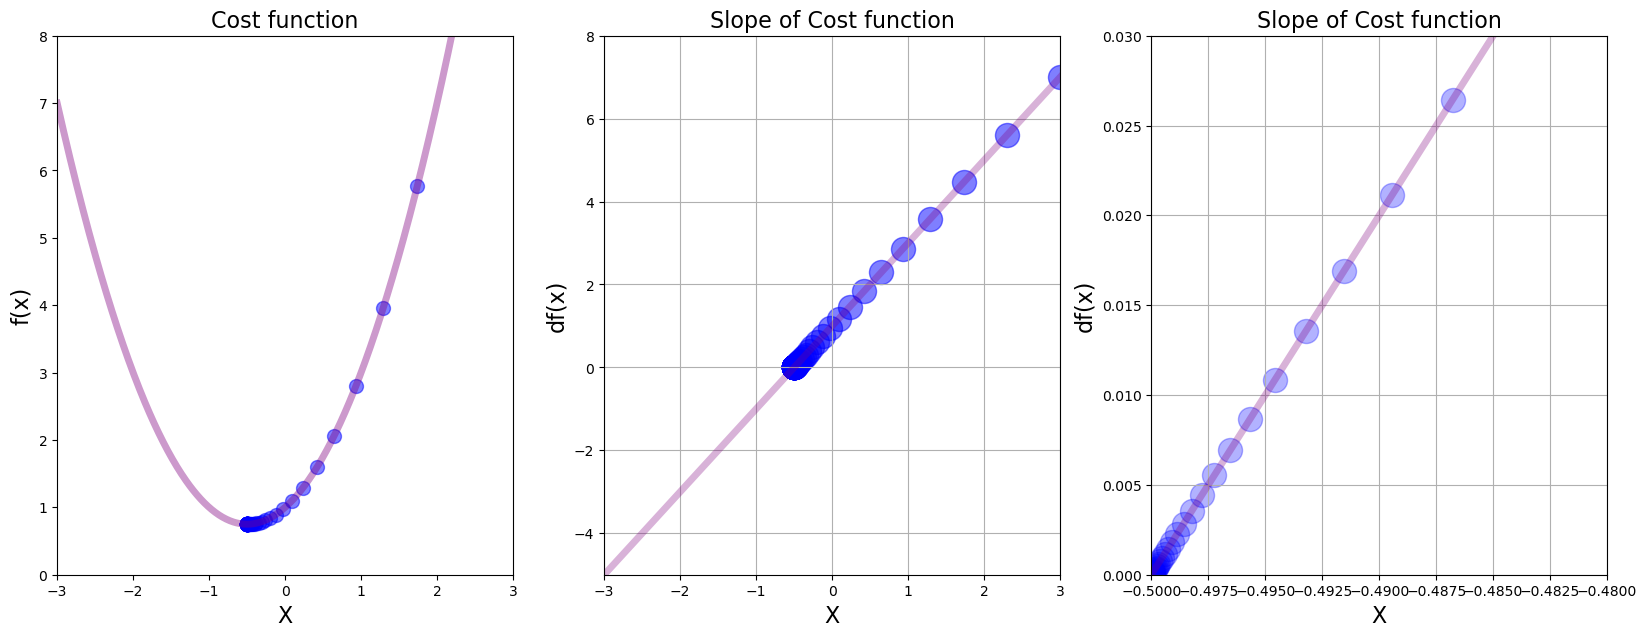

In [26]:


new_x = 3
prev_x =0
step_multiplier = 0.1
precision = 0.0000001  # gewünschte Präzision
# präzision ist der Unterschie zwischen dem alten und neuem x wert
# wenn wir ganz nah sind wird der Unterschied immer geringer
x_list = [new_x]
slope_list = [df(new_x)]

for n in range(100):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x -step_multiplier * gradient

    # dadurch bewegen wir uns in Richtung des Minimus 
    # wir bekommen nach den Durchlaufen dann einen Wert X heraus an dem das Minimum liegt
    # -step_multiplier * gradient hier liegt das Lernen, also das Anpassen des
    # Algorithmus -> predict > Calculate error > learn/adapt
    
    step_size = abs(new_x - prev_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    #print(step_size)
    if step_size <= precision:
        print("präzise ! ")
        print(n)
        break

        
# Überlager die Gradien descent Berechnungen

plt.figure(figsize =[20,7])

plt.subplot(1,3,1)
# subplot(row, column, index)
plt.xlim([-3,3])
plt.ylim(0,8)

plt.title("Cost function", fontsize = 16)
plt.xlabel("X", fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)

plt.plot(x_1, f(x_1), color = "purple", linewidth=5, alpha=0.4)


#scatterplot der gradent descents
values = np.array(x_list)
plt.scatter(x_list, f(values), color = "blue", s =100, alpha = 0.5)

#second plot:

plt.subplot(1,3,2)
plt.title("Slope of Cost function", fontsize = 16)
plt.xlim([-3,3])

plt.grid()
plt.ylim(-5,8)
plt.xlabel("X", fontsize = 16)
plt.ylabel("df(x)", fontsize = 16)

plt.scatter(x_list, slope_list, color = "blue", s =300, alpha = 0.5)

plt.plot(x_1, df(x_1), color = "purple", linewidth=5, alpha = 0.3)


#third plot close-up:



plt.subplot(1,3,3)
plt.title("Slope of Cost function", fontsize = 16)
plt.xlim(-0.5,-0.48)

plt.grid()
plt.ylim(0,0.03)
plt.xlabel("X", fontsize = 16)
plt.ylabel("df(x)", fontsize = 16)

plt.scatter(x_list, slope_list, color = "blue", s =300, alpha = 0.3)

plt.plot(x_1, df(x_1), color = "purple", linewidth=5, alpha = 0.3)


plt.show()






# Example 2 - multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 +5 $$


In [27]:
# Make data
x_2 = np.linspace(-2,2,100)

# g(x) und dg(x)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 -8*x



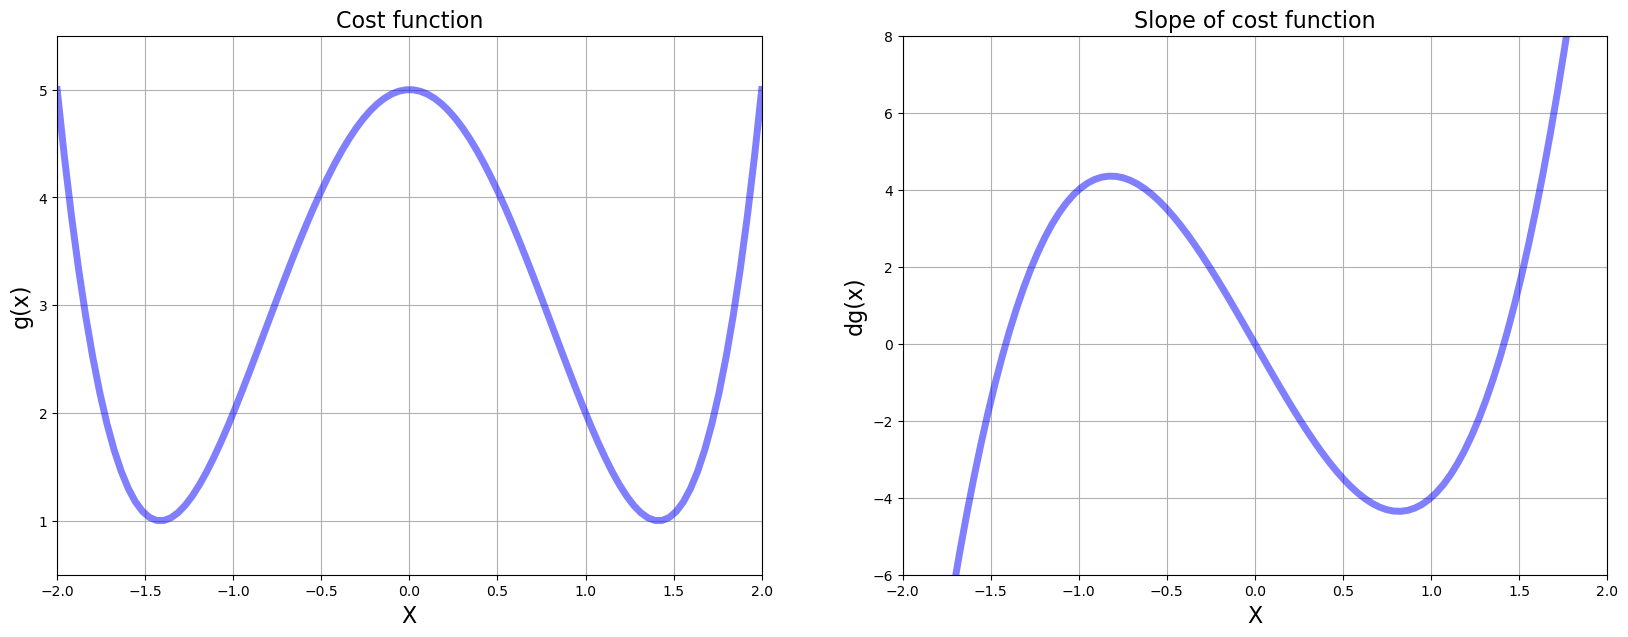

In [28]:
# make cost function 

plt.figure(figsize =[20,7])

#1st plot loss function
plt.subplot(1,2,1)
plt.title("Cost function", fontsize = 16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel("X", fontsize = 16)
plt.ylabel("g(x)", fontsize = 16)


plt.plot(x_2, g(x_2), color = "blue", linewidth=5, alpha = 0.5)



# 2n plot, slope
plt.subplot(1,2,2)
plt.title("Slope of cost function", fontsize = 16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel("X", fontsize = 16)
plt.ylabel("dg(x)", fontsize = 16)

plt.plot(x_2, dg(x_2),  color = "blue", linewidth=5, alpha = 0.5)



plt.show()

### function with a function as arguments, default values, pass multiple arguments

## Gradient Descent as a Python Function

In [29]:
# 4 Werte: Ableitung, initial_guess, learning_rate (multiplier), precision
# In Python ist eine Funktion ein Objekt, dass übergeben werden kann

def gradient_descent2(derivative_fun, initial_guess, learning_rate, precision):
    
    new_x = initial_guess
    
    x_list = [new_x]
    slope_list = [derivative_fun(new_x)]
 
    
    for n in range(100):
        prev_x = new_x
        gradient = derivative_fun(prev_x)
        new_x = prev_x -learning_rate * gradient
        
        step_size = abs(new_x - prev_x)
        
        x_list.append(new_x)
        slope_list.append(derivative_fun(new_x))

        if step_size <= precision:
            break
        
    return new_x, x_list, slope_list

        

#gradient_descent(dg,0.5,0.0,0.0001)
    
    
  

In [30]:
local_min, list_x, deriv_list = gradient_descent(dg, -0.5,0.02, 0.0001)
                                                
print(f"Local min occurs at: {local_min}")
print(f"Number of steps taken: {len(list_x)}")
#pint(f"")

NameError: name 'gradient_descent' is not defined

In [31]:
local_min, list_x, deriv_list = gradient_descent(derivative_fun = dg, initial_guess = 0.5,
                                                 learning_rate = 0.02, precision = 0.0001)
print(f"Local min occurs at: {local_min}")
print(f"Number of steps taken: {len(list_x)}")
#pint(f"")

NameError: name 'gradient_descent' is not defined

## Giving default values:


In [32]:

        

def gradient_descent(derivative_fun, initial_guess, learning_rate=0.02, precision=0.001, 
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_fun(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_fun(previous_x)
        new_x = previous_x - learning_rate * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_fun(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list
   


In [33]:
local_min, list_x, deriv_list = gradient_descent(derivative_fun = dg, initial_guess = 0.5)
print(f"Number of steps taken: {len(list_x)}")
print(f"Local min occurs at: {local_min}")


Number of steps taken: 23
Local min occurs at: 1.4122375085019094


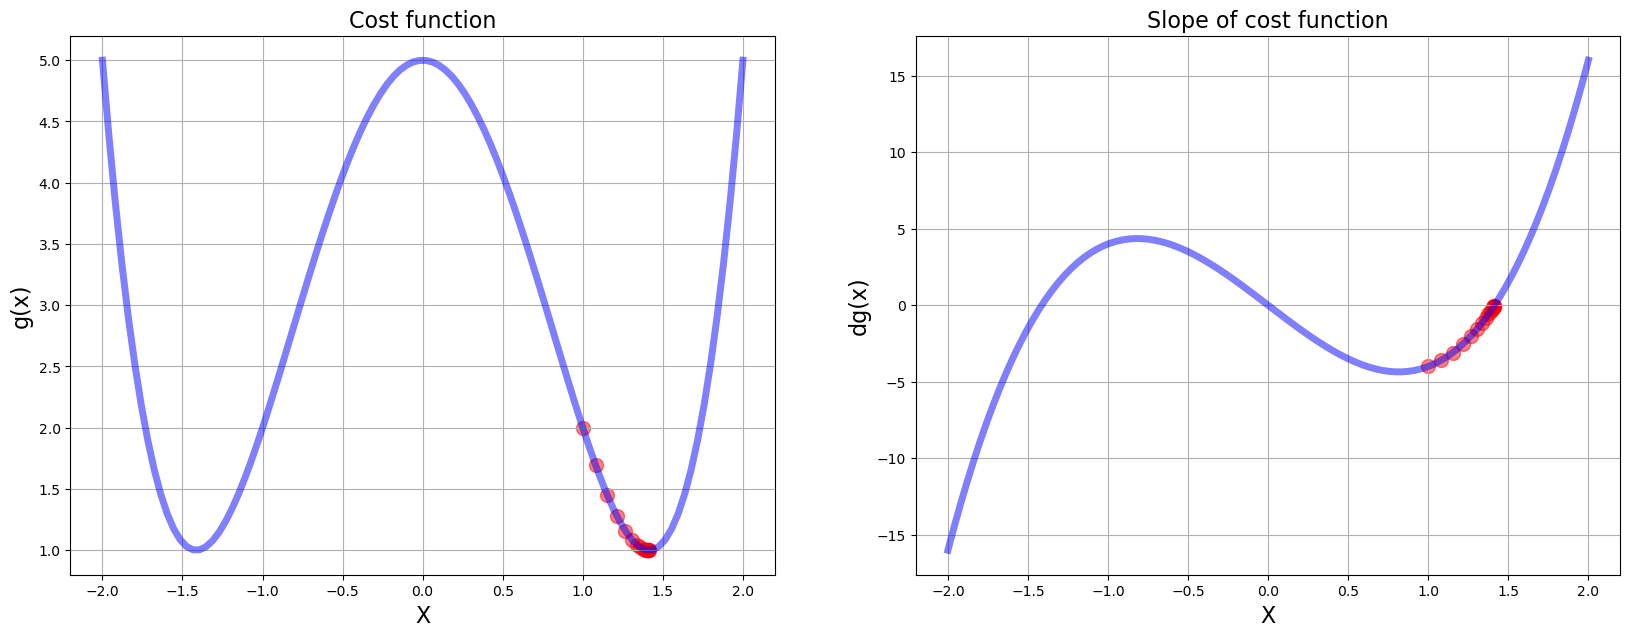

In [34]:
# make cost function 


local_min, list_x, deriv_list = gradient_descent(derivative_fun = dg, initial_guess = 1)
plt.figure(figsize =[20,7])

#1st plot loss function
plt.subplot(1,2,1)
plt.title("Cost function", fontsize = 16)
plt.grid()
#plt.xlim(0,1.5)
#plt.ylim(1,4)
plt.xlabel("X", fontsize = 16)
plt.ylabel("g(x)", fontsize = 16)

values = np.array(list_x)
plt.scatter(list_x, g(values), color = "red", s =100, alpha = 0.5)
plt.plot(x_2, g(x_2), color = "blue", linewidth=5, alpha = 0.5)



# 2n plot, slope
plt.subplot(1,2,2)
plt.title("Slope of cost function", fontsize = 16)
plt.grid()
#plt.xlim(0,1.5)
#plt.ylim(-6,0)
plt.xlabel("X", fontsize = 16)
plt.ylabel("dg(x)", fontsize = 16)

plt.scatter(list_x,deriv_list , color = "red", s =100,  alpha = 0.5)
plt.plot(x_2, dg(x_2),  color = "blue", linewidth=5, alpha = 0.5)




plt.show()

### Mit dieser Funktion finden wir eine Nullstelle in der Ableitung und damit 1 Extrempunkt -> Unser Startpunkt bestimmt das Resultat


### Es gibt verschiede gradient descent versionen. Unsere heißt gradient descent batch

### eine andere gradient descent stochastic, diese baut variation durch Zufall ein

### alle haben pros und cons


# Example 3 - Divergence, Overflow, Python Tuples
## $$h(x) = x^5 -2x^4 +2$$

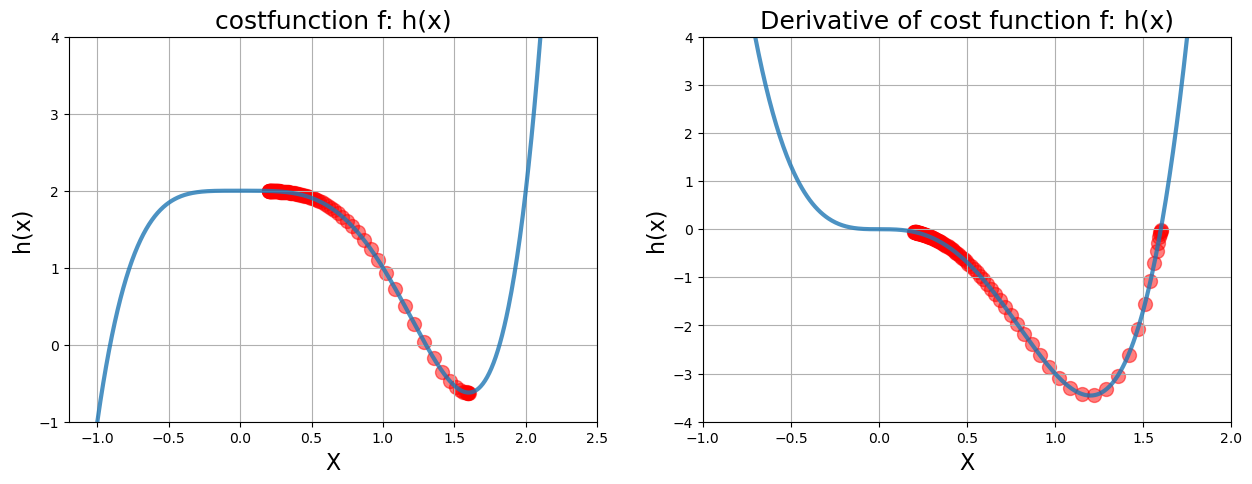

Local min occurs at: 1.5989534547394717
Cost of minim is -0.6214287992331258
Number of Steps 73


In [35]:
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)
# x_3 erhält 1000 Zahwln zwischen -2.5 und 2.5

def h(x):
    return x**5 - 2*x**4 +2

def dh(x):
    return 5*x**4 - 8*x**3


local_min, list_x, deriv_list = gradient_descent(derivative_fun = dh, initial_guess = 0.2)
#plot function and derivation side by side

plt.figure(figsize =[15,5])



#Chart 1: cost function
plt.subplot(1,2,1)

plt.grid()
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.title("costfunction f: h(x)",fontsize = 18)
plt.xlabel("X", fontsize = 16)
plt.ylabel("h(x)", fontsize = 16)


plt.plot(x_3,h(x_3), linewidth=3, alpha= 0.8)
plt.scatter(list_x, h(np.array(list_x)), color ="red", s=100, alpha =0.5)


#Chart 2: Derivative
plt.subplot(1,2,2)

plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,4)

plt.title("Derivative of cost function f: h(x)",fontsize = 18)
plt.xlabel("X", fontsize = 16)
plt.ylabel("h(x)", fontsize = 16)

plt.plot(x_3,dh(x_3), linewidth=3, alpha = 0.8)
plt.scatter(list_x, deriv_list, color = "red", s=100, alpha =0.5)

plt.show()

print(f"Local min occurs at: {local_min}")
print(f"Cost of minim is {h(local_min)}")
print(f"Number of Steps {len(x_list)}")


## Python Tuples 
### sequence unpacking
#### anders als listen, kann der Inhalt verschiedener Typen sein
#### tuples sind immutable, wir können sie später nicht verändern oder hinzufügen

In [36]:
# creating a tuple by: tuple packing 
breakfast = "coffee", "eggs", "bread" 

print(breakfast[0])


#wir können die WErte eines Tuples in eine line zuweisen -> sequence unpacking

drink, protein, side = breakfast
print(drink)
print(protein)
print(side)


coffee
coffee
eggs
bread


## Learning rate


number of steps 13


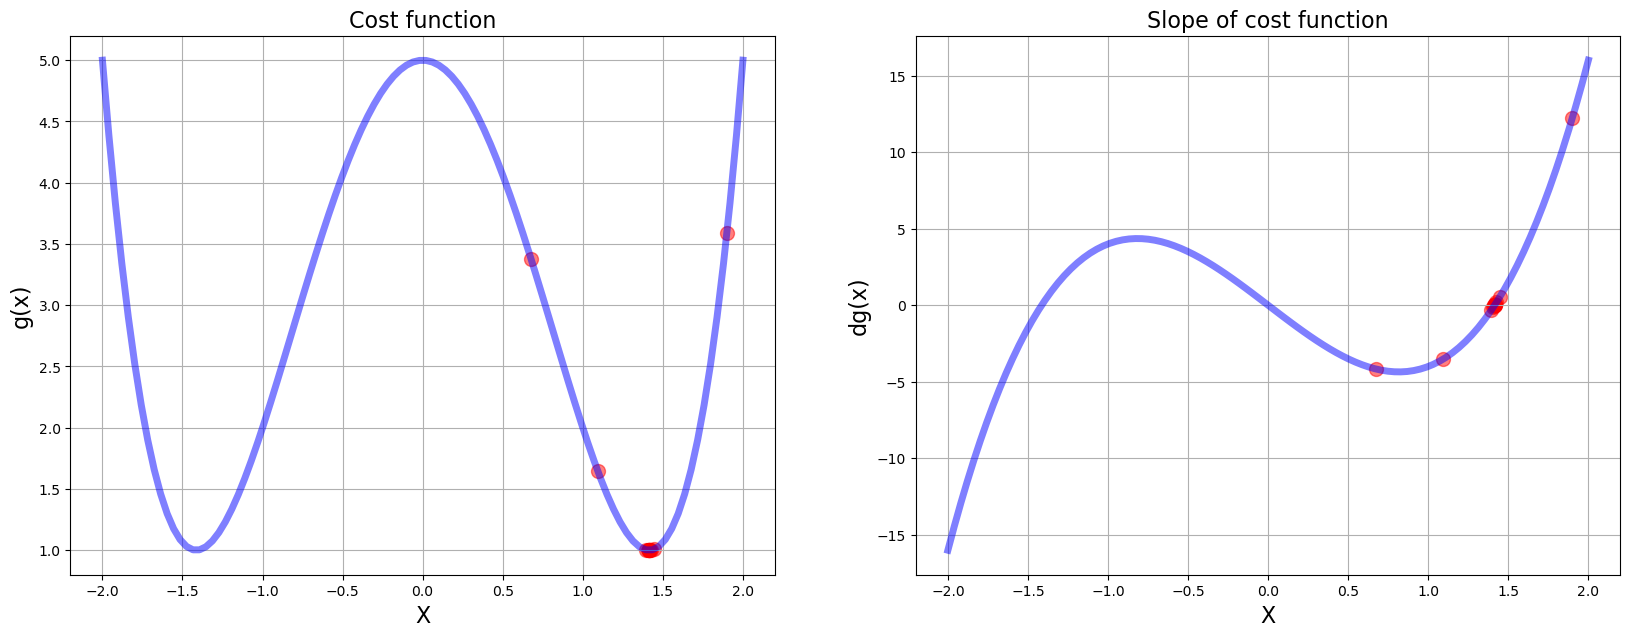

In [37]:
# make cost function 


local_min, list_x, deriv_list = gradient_descent(derivative_fun = dg, initial_guess = 1.9, learning_rate=0.1)
plt.figure(figsize =[20,7])

#1st plot loss function
plt.subplot(1,2,1)
plt.title("Cost function", fontsize = 16)
plt.grid()
#plt.xlim(0,1.5)
#plt.ylim(1,4)
plt.xlabel("X", fontsize = 16)
plt.ylabel("g(x)", fontsize = 16)

values = np.array(list_x)
plt.scatter(list_x, g(values), color = "red", s =100, alpha = 0.5)
plt.plot(x_2, g(x_2), color = "blue", linewidth=5, alpha = 0.5)



# 2n plot, slope
plt.subplot(1,2,2)
plt.title("Slope of cost function", fontsize = 16)
plt.grid()
#plt.xlim(0,1.5)
#plt.ylim(-6,0)
plt.xlabel("X", fontsize = 16)
plt.ylabel("dg(x)", fontsize = 16)

plt.scatter(list_x,deriv_list , color = "red", s =100,  alpha = 0.5)
plt.plot(x_2, dg(x_2),  color = "blue", linewidth=5, alpha = 0.5)


print(f"number of steps {len(list_x)}")

plt.show()

In [38]:
n = 100
#low_gamma = gradient_descent(derivative_fun = dg, initial_guess = 3, learning_rate=0.005, precision = 0.0001, max_iter = n)

low_gamma = gradient_descent(derivative_fun=dg, initial_guess= 3,
                                                learning_rate=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_fun=dg, initial_guess= 3,
                                                learning_rate=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_fun=dg, initial_guess= 3,
                                                learning_rate = 0.002, precision=0.0001, max_iter=n)


plt.figure(figsize=[20, 10])

plt.xlim(0, len(low_values))
plt.ylim(0, 50)
plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, len(low_values)))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)


# Plotting the mid learning rate

mid_values = np.array(mid_gamma[1])

plt.plot(iteration_list, g(mid_values), color='pink', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='pink', s=80)

# Plotting the high learning rate

high_values = np.array(high_gamma[1])
plt.plot(iteration_list, g(high_values), color='blue', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='blue', s=80)



plt.show()


NameError: name 'low_values' is not defined

<Figure size 2000x1000 with 0 Axes>

### JE größer die learn_rate desto schneller kommen wir zu unserem Minimum


# Example 4 - Data Visualisation with 3D Charts
## Minimise  $$f(x,y) = \frac{1}{3{-x^2 -y^2}+1}$$

## Minimes $$ f(x,y) = \frac{1}{r+1}$$
where $r$ is $3^{-x^2-y^2}$


In [59]:
def f(x,y):
    r = 3**(-x**2 -y**2)
    return 1/(r+1)

In [62]:
# Make data
x_4 = np.linspace(start =-2, stop = 2, num  =200)
y_4 = np.linspace(start =-2, stop = 2, num  =200)

# wir brauchen ein 2d array für den 3d raum
x_4, y_4 = np.meshgrid(x_4,y_4) # macht 2d array aus 1d array


#print("Shape of X array",x_4.shape)

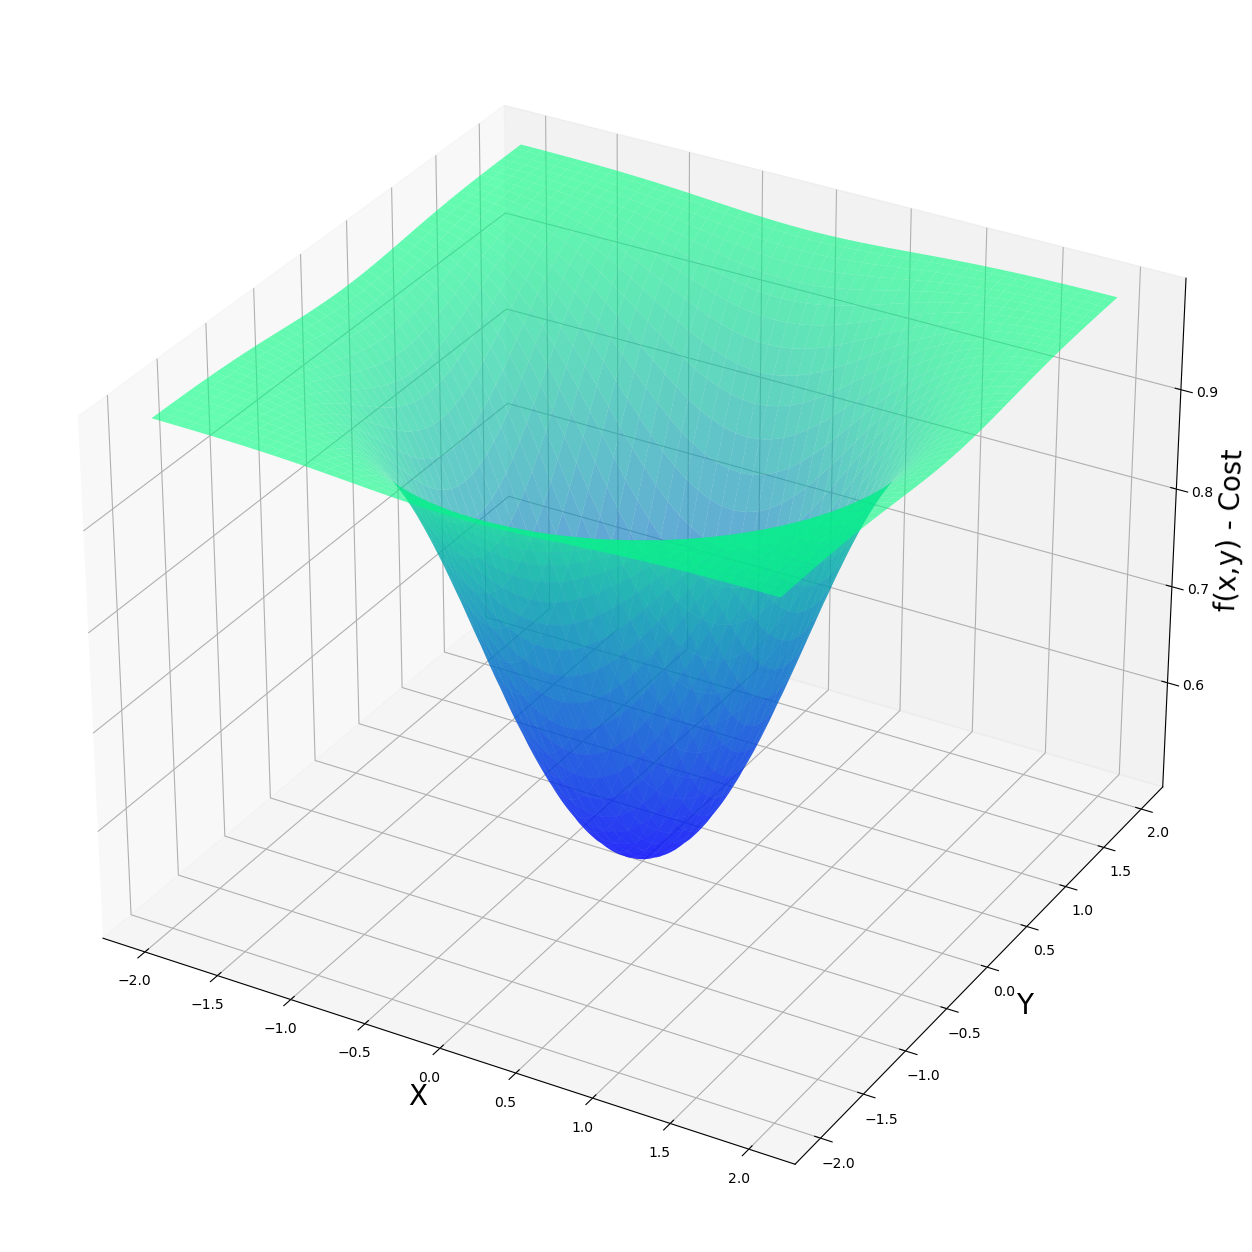

In [84]:
# für 3d Plot
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap
#die figure funktion hat einen return wert -> eine Figure, den wir speichern wollen
fig = plt.figure(figsize = [16,16])
# figure ist wie ein container für anderes

ax = fig.add_subplot(projection='3d') # schafft den 3d Raum
# gca = get current axis

ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x,y) - Cost", fontsize = 20)

ax.plot_surface(x_4,y_4, f(x_4,y_4), cmap=cm.winter, alpha = 0.6)

# je blauer desto geringer die Kosten
